In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)


train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

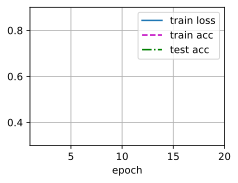

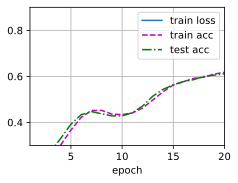

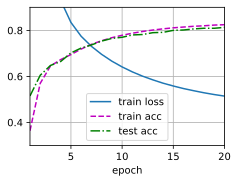

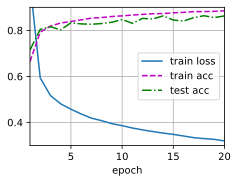

In [4]:
# practice 1

batch_size, lrs, num_epochs = 256, [0.0001,0.001,0.01,0.1], 20

for lr in lrs: 
    net.apply(init_weights)
    loss = nn.CrossEntropyLoss(reduction='none')
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


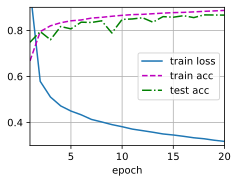

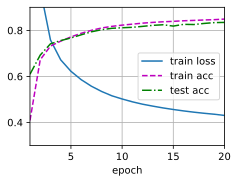

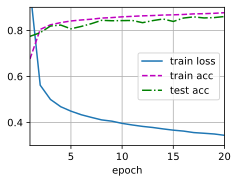

In [5]:
# practice 2

# ReLU
net.apply(init_weights)
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# sigmoid
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.Sigmoid(), nn.Linear(256, 10))
net.apply(init_weights)
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


# tanh
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.Tanh(), nn.Linear(256, 10))
net.apply(init_weights)
loss = nn.CrossEntropyLoss(reduction="none")
trainer = torch.optim.SGD(net.parameters(), lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)



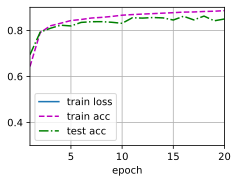

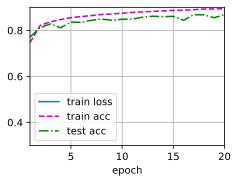

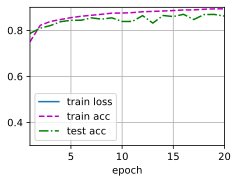

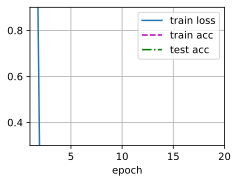

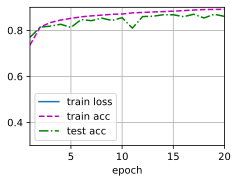

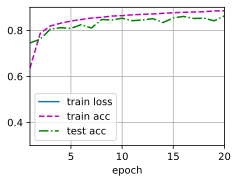

In [6]:
# practice 3
import torch.nn.init as init

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))


def init_weights_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        nn.init.zeros_(m.bias)


def init_weights_xavier(m):
    if type(m) == nn.Linear:
        init.xavier_uniform_(m.weight)  # Xavier均匀分布初始化
        init.zeros_(m.bias)


def init_weights_kaiming(m):
    if type(m) == nn.Linear:
        init.kaiming_normal_(
            m.weight, mode="fan_in", nonlinearity="relu"
        )  # He正态分布初始化
        init.zeros_(m.bias)


def init_weights_constant(m):
    if type(m) == nn.Linear:
        init.constant_(m.weight, 0.5)  # 常数初始化
        init.zeros_(m.bias)


def init_weights_orthogonal(m):
    if type(m) == nn.Linear:
        init.orthogonal_(m.weight)  # 正交初始化
        init.zeros_(m.bias)


def init_weights_sparse(m):
    if type(m) == nn.Linear:
        init.sparse_(m.weight, sparsity=0.1)  # 稀疏初始化
        init.zeros_(m.bias)


init_functions = [
    init_weights_normal,
    init_weights_xavier,
    init_weights_kaiming,
    init_weights_constant,
    init_weights_orthogonal,
    init_weights_sparse,
]


for init_func in init_functions:
    net.apply(init_func)
    loss = nn.CrossEntropyLoss()
    trainer = torch.optim.SGD(net.parameters(), lr=0.1)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
